In [ ]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt



In [ ]:
# Membuat tabel

tabel = pd.DataFrame (
    {'A' : [2,1,3] ,
     'B' : [5,4,0] ,
     'C' : [1,2,4] }
) 
tabel

,A,B,C
0,2,5,1
1,1,4,2
2,3,0,4


In [59]:
# Menaruh tiap kolom dalam variabel A,B,C

A = tabel.A
B = tabel.B
C = tabel.C

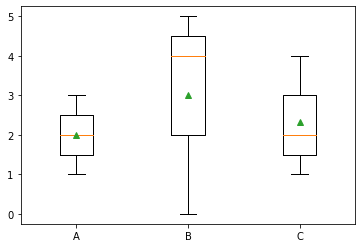

In [ ]:
# Visualisasi Data dengan boxplot

plt.boxplot([A,B,C], labels = ['A' , 'B' , 'C']  , showmeans=True) ;

In [ ]:
# Melakukan uji anova dengan fungsi 'stats'
# Dalam pengambilan keputusan kita bisa melihat dari F Statistic atau nilai p value nya
# Kalau Nilai F Statistik < F Tabel maka keputusan tersebut diterima atau p value > 0,5    |  Tapi kalau sebaliknya maka H0 ditolak .

from scipy import stats
stats.f_oneway (A, B, C)

F_onewayResult(statistic=0.22580645161290325, pvalue=0.8043570000000001)

In [ ]:
# Melihat kembali tabel kita

tabel

,A,B,C
0,2,5,1
1,1,4,2
2,3,0,4


In [ ]:
# Buat kolom dalam tabel nya menjadi 1 baris (1 kolom kategori)

tabel_baru = pd.melt (tabel , var_name = 'Merek' , value_name = 'Penjualan')

tabel_baru

,Merek,Penjualan
0,A,2
1,A,1
2,A,3
3,B,5
4,B,4
5,B,0
6,C,1
7,C,2
8,C,4


In [ ]:
# Melakukan Uji Anova dengan library Statsmodels (R Style)
# Formula harus sesuai dengan var_name dan value_name  .
# Keterangan : Df Residuals (Df Within) , Df Model (Df Between)   .

from statsmodels.formula.api import ols

hasil = ols(formula = 'Penjualan ~ Merek' , data = tabel_baru).fit()
print(hasil.summary());

                            OLS Regression Results                            
Dep. Variable:              Penjualan   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                 -0.240
Method:                 Least Squares   F-statistic:                    0.2258
Date:                Wed, 16 Jun 2021   Prob (F-statistic):              0.804
Time:                        08:20:41   Log-Likelihood:                -16.511
No. Observations:                   9   AIC:                             39.02
Df Residuals:                       6   BIC:                             39.61
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0000      1.072      1.867      0.1

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


In [ ]:
# Melihat beberapa hasil lainnya .

from statsmodels.stats.anova import anova_lm
hasil_1 = anova_lm(hasil)

hasil_1

,df,sum_sq,mean_sq,F,PR(>F)
Merek,2.0,1.555556,0.777778,0.225806,0.804357
Residual,6.0,20.666667,3.444444,NaN,NaN
